In [2]:
import pandas as pd
dataset=pd.read_csv("tweets.csv",encoding='ISO-8859-1')
dataset.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


In [3]:


def gen_freq(text):
    word_list = []
    for tw_words in text.split():
        word_list.extend(tw_words)
    word_freq = pd.Series(word_list).value_counts()
    word_freq[:10]
    return word_freq



In [4]:
word_freq=gen_freq(dataset.text.str)
word_freq

RT                         11053
to                          7650
is                          5152
in                          4491
the                         4331
                           ...  
#News                          1
notes|                         1
https://t.co/ECl4oIzdHA        1
https://t.co/9MjFtLtCtR        1
https://t.co/hwgqjbqgvG        1
Length: 19601, dtype: int64

In [6]:
!pip install wordcloud

ERROR: Could not find a version that satisfies the requirement wordclous (from versions: none)
ERROR: No matching distribution found for wordclous


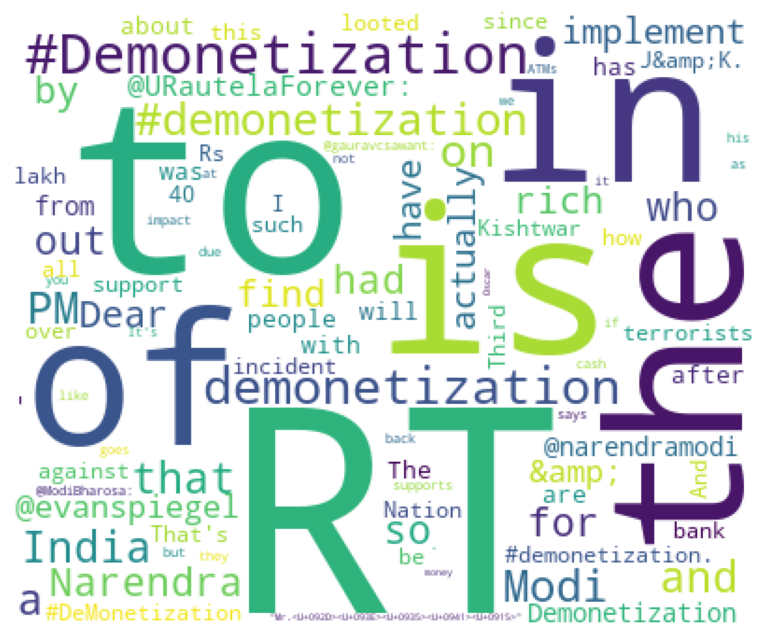

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wc=WordCloud(width=400,height=330,max_words=200,background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(12,8))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [26]:
import re
def clean_text(text):  
    text = re.sub(r'RT', '', text)
    text = re.sub(r'&amp;', '', text)
    text = re.sub(r'[?!.;:,#@-]', '', text)
    text =re.sub(r'\d+', '', text)
    text = re.sub(r'%', '', text)
    return text

In [27]:
from wordcloud import STOPWORDS
print(STOPWORDS)

{"here's", "where's", "you're", 'his', 'between', 'no', 'doing', 'myself', 'until', "it's", 'and', 'are', 'could', 'itself', 'what', 'being', 'get', 'otherwise', 'shall', 'from', 'they', 'hence', 'where', "who's", 'all', 'r', "they're", 'during', 'just', "he'll", "she's", 'off', 'can', 'above', 'my', "you'd", "why's", 'yours', 'these', 'did', 'cannot', 'those', 'each', 'to', 'or', 'been', "how's", 'when', 'ever', "she'll", 'who', 'your', 'you', "i'm", 'if', 'down', "shan't", 'would', 'not', 'but', "we'd", "hasn't", "doesn't", 'them', 'any', 'into', "let's", 'ours', 'is', 'so', 'therefore', 'again', 'with', "aren't", "he'd", 'this', 'she', 'yourself', "weren't", 'more', 'should', 'also', "they've", 'here', "i've", "mustn't", 'too', 'through', "you've", 'before', 'me', "hadn't", 'for', 'that', 'ought', 'which', 'was', "i'll", 'were', "haven't", 'has', 'then', "didn't", "we're", "there's", 'theirs', 'our', 'however', "he's", 'very', "don't", 'because', "wasn't", 'same', "you'll", 'there',

In [ ]:
text=dataset.text.apply(lambda x: clean_rext(x))
word_freq